# Data Collection

In [1]:
import numpy as np
import pandas as pd
import random as rnd

import seaborn as sns
sns.set_palette('Set2')
import matplotlib.pyplot as plt
%matplotlib inline

dt = pd.read_csv('psychological_survey.csv')

In [2]:
dt.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [3]:
# Statistical Analysis of data
dt.describe()

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


In [4]:
# clean the ages 
dt.loc[(dt['What is your age?'] > 90), 'What is your age?'] = 34
dt.loc[(dt['What is your age?'] < 10), 'What is your age?'] = 34

print('Age\tCount')
dt['What is your age?'].value_counts()

Age	Count


30    94
31    82
29    79
28    74
35    74
32    72
34    72
33    69
26    64
27    63
37    59
39    55
38    54
36    50
25    44
24    42
40    36
22    32
44    31
43    30
42    29
45    27
23    24
41    24
46    22
21    15
47    14
49    13
55    12
48     9
50     9
52     7
54     7
51     7
20     6
56     5
57     4
63     4
19     4
53     3
59     2
61     2
17     1
74     1
70     1
58     1
62     1
65     1
66     1
15     1
Name: What is your age?, dtype: int64

# Data visualization

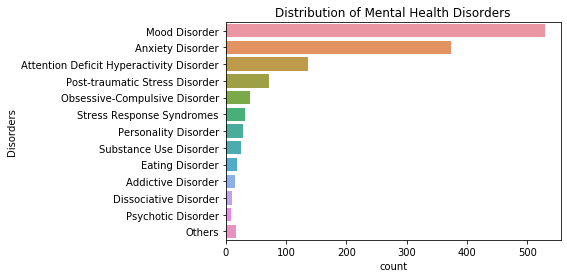

In [5]:
disorders = {}

disorderCounts = dict(dt['If so, what condition(s) were you diagnosed with?'].value_counts())
for i in disorderCounts:
    # get the disorders separately in case someone answered with more than one disorder
    disorderList = i.split('|')
    for j in disorderList:
        j = j.split(' (')[0]
        disorders[j] = disorders.get(j, 0) + disorderCounts[i]

tmp = pd.DataFrame()
for i in disorders:
    tmp = tmp.append([i] * disorders[i])

tmp[0] = tmp[0].replace([
    'Autism Spectrum Disorder', 'Autism - while not a "mental illness", still greatly affects how I handle anxiety',
    'autism spectrum disorder', 'PDD-NOS'], 'Autism')
tmp[0] = tmp[0].replace(['Aspergers', 'Asperger Syndrome'], "Asperger's Syndrome")
tmp[0] = tmp[0].replace(['posttraumatic stress disourder'], 'Post-traumatic Stress Disorder')
tmp[0] = tmp[0].replace(['ADD', 'Attention Deficit Disorder', 'attention deficit disorder'],
                       'Attention Deficit Hyperactivity Disorder')
tmp[0] = tmp[0].replace(['Schizotypal Personality Disorder'], 'Personality Disorder')
tmp[0] = tmp[0].replace(['Depression'], 'Mood Disorder')
tmp[0] = tmp[0].replace([
    'Autism', "Asperger's Syndrome", 'Intimate Disorder',
    'Seasonal Affective Disorder', 'Burn out', 'Gender Identity Disorder',
    'Suicidal Ideation', 'Gender Dysphoria', 'MCD'], 'Others')

g = sns.countplot(y=tmp[0], order=[
    'Mood Disorder', 'Anxiety Disorder', 'Attention Deficit Hyperactivity Disorder',
    'Post-traumatic Stress Disorder', 'Obsessive-Compulsive Disorder',
    'Stress Response Syndromes', 'Personality Disorder', 'Substance Use Disorder',
    'Eating Disorder', 'Addictive Disorder', 'Dissociative Disorder', 
    'Psychotic Disorder', 'Others'])
g.set_ylabel('Disorders')
g.set_title('Distribution of Mental Health Disorders')
plt.show()

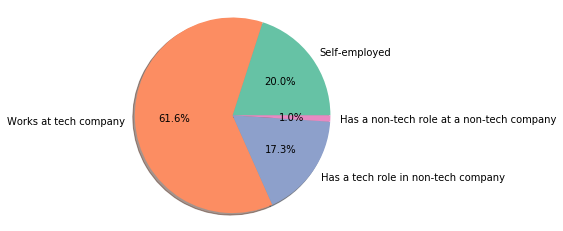

In [6]:
# pie chart of workers
labels = ['Self-employed', 'Works at tech company', 'Has a tech role in non-tech company', 'Has a non-tech role at a non-tech company']
sizes = [dt['Are you self-employed?'].value_counts()[1],
         dt['Is your employer primarily a tech company/organization?'].value_counts()[1],
         dt['Is your primary role within your company related to tech/IT?'].value_counts()[1],
         dt['Is your primary role within your company related to tech/IT?'].value_counts()[0]
        ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

C:\Users\Rajaraman\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Rajaraman\Anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout()


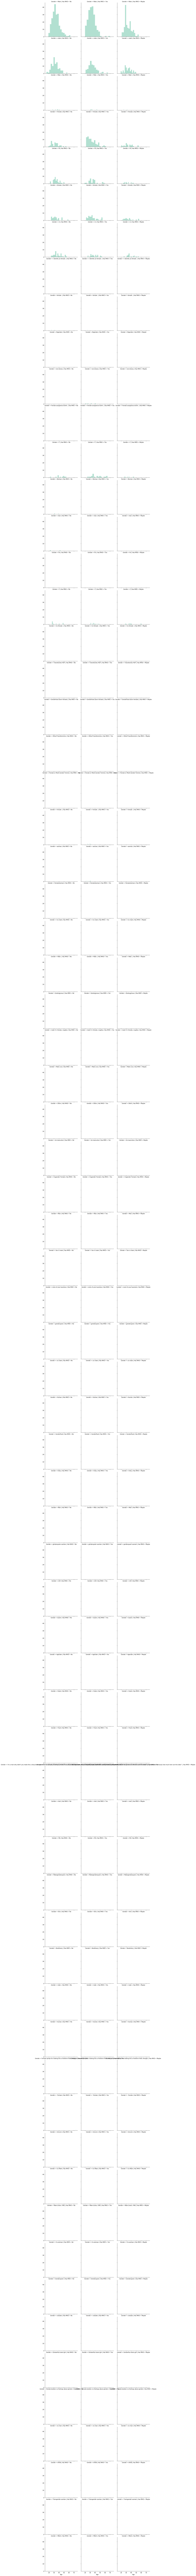

In [7]:
# Rename columns
dt.rename(columns={'What is your age?': 'Age',
                     'What is your gender?': 'Gender',
                     'Do you currently have a mental health disorder?': 'Has MHD'}, inplace=True)
g = sns.FacetGrid(dt, row='Gender', col='Has MHD', size=4)
g.map(plt.hist, 'Age', alpha=0.5, bins=15)
g.add_legend()
plt.show()

In [8]:
dt.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",Age,Gender,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [10]:
dt.shape

(1433, 63)